In [38]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from unsuper import *
import seaborn as sns

sns.set_style('ticks')
sns.set(font_scale=0.5)

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from pyclustering.cluster import optics


import os   # For os related operations
import sys  # For data size
%matplotlib inline

In [2]:
data = load_data(monte=False)
#X=data
#print(X.shape)
inputs_col = pd.DataFrame()

data['u-g']=data['u']-data['g']
data['g-r']=data['g']-data['r']
data['r-i']=data['r']-data['i']
data['i-z']=data['i']-data['z']
data['z-y']=data['z']-data['y']
data['u-G']=data['u']-data['G']
data['u-RP']=data['u']-data['RP']
data['u-BP']=data['u']-data['BP']

#X = data[['u-g', 'g-r', 'r-i', 'i-z', 'z-y', 'u-G', 'u-RP', 'u-BP']].copy()
#X = normalize(X_input)
X2 = data[['u-g', 'g-r', 'r-i', 'i-z', 'z-y', 'u-G', 'u-RP', 'u-BP',  'Teff', 'logg', 'feh']].copy()
X = data[['u-g', 'g-r', 'r-i', 'i-z', 'z-y', 'u-G', 'u-RP', 'u-BP']].copy()

In [3]:
# find spread for each dimension
X.shape

(14275, 8)

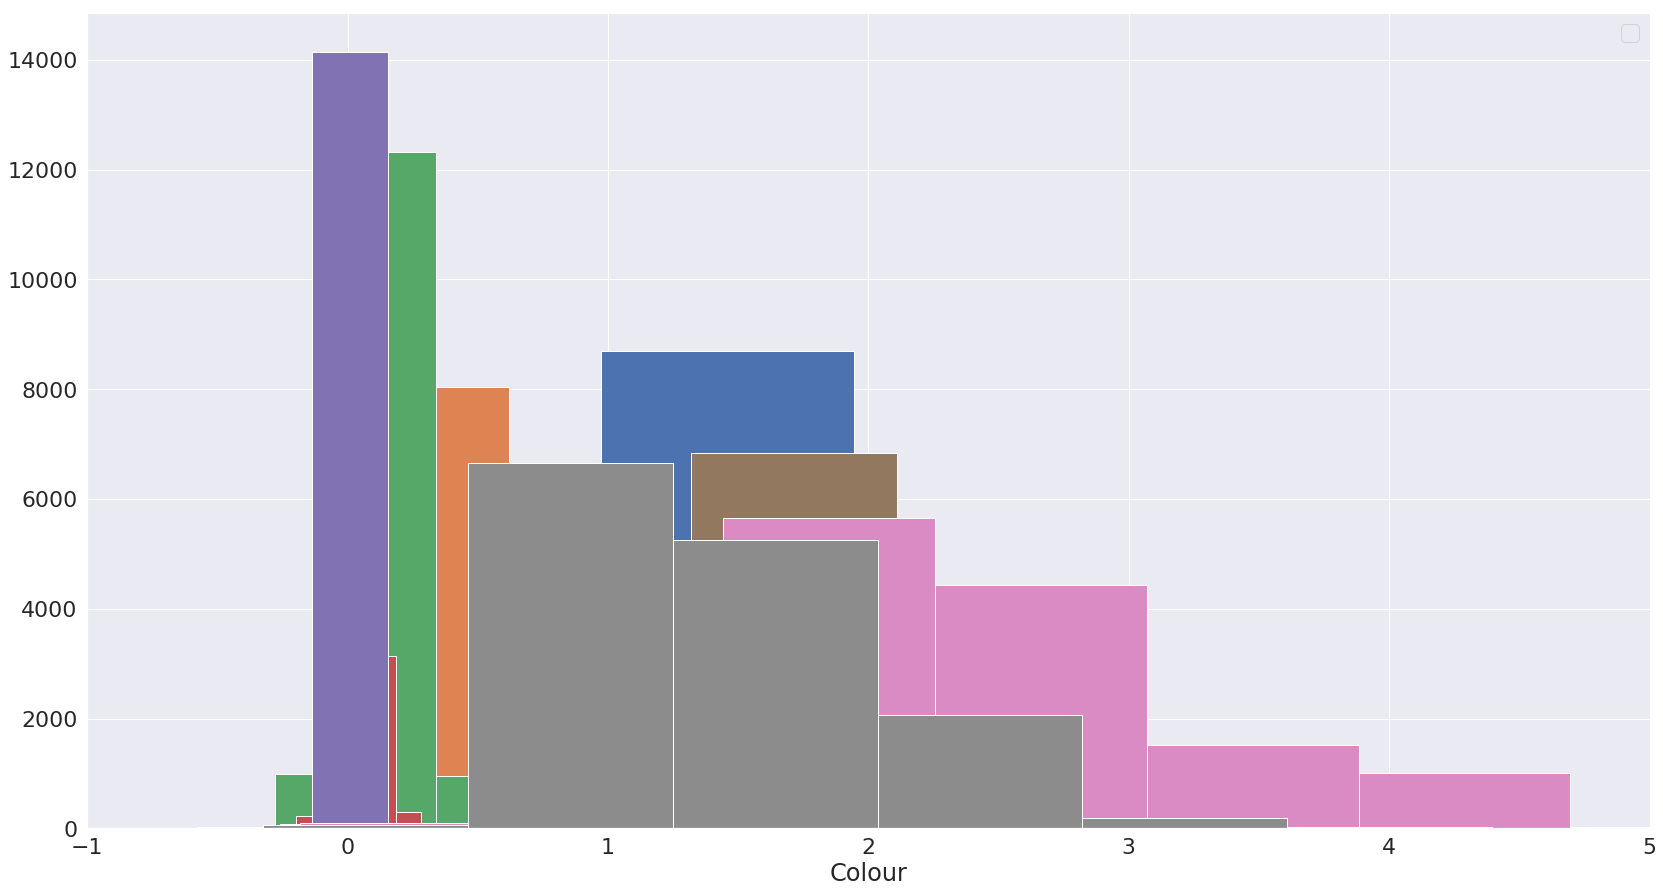

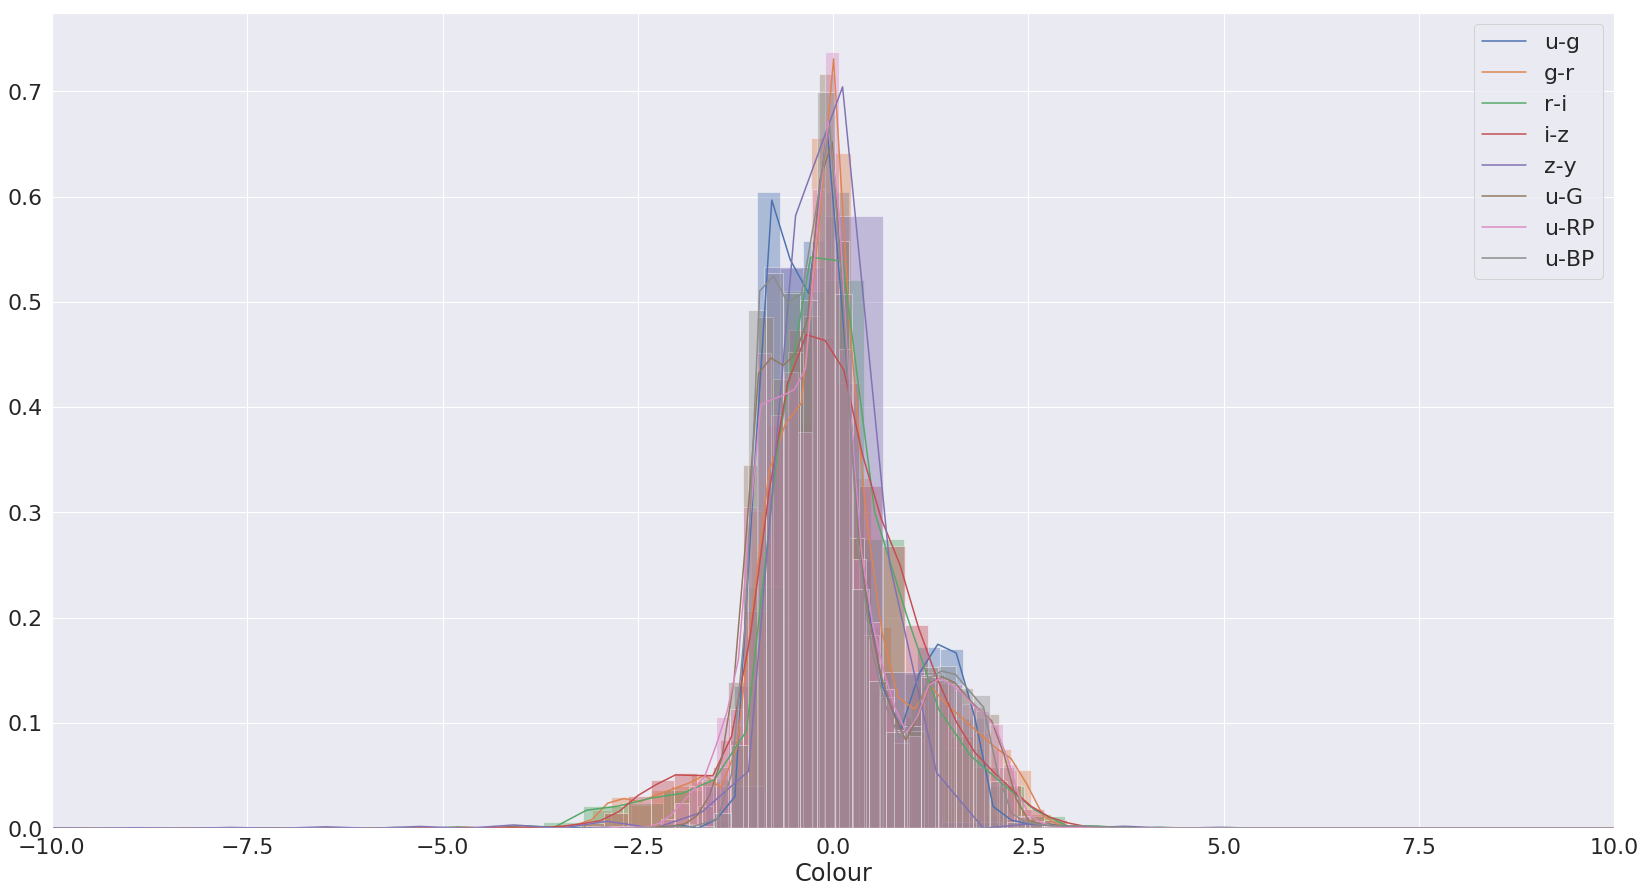

In [13]:
N = int(0.01*X.shape[0])

X_norm = normalize(X)
X2_norm = normalize(X2)

X_norm = X_norm
X2_norm = X2_norm

reach_size = (28, 15)
fig, ax = plt.subplots(figsize=reach_size)

for column in X.head():
    #bins=np.linspace(min(X[column]), max(X[column]) + binwidth, binwidth)
    plt.hist(X[column], bins=20)#kde_kws={"label": column}, bins=10)
    ax.set_xlim(-1, 5)
    ax.set_xlabel('Colour')
    ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=reach_size)
for column in X_norm.head():
    ax = sns.distplot(X_norm[column], kde_kws={"label": column}, bins=100)
    ax.set_xlim(-10, 10)
    ax.set_xlabel('Colour')
    ax.legend()
plt.show()

In [14]:
from sklearn.cluster import OPTICS
sklearn.__version__

clust = OPTICS(min_samples=N, rejection_ratio=0.01, max_eps=40.)
import hdbscan


# Run the fit
clust.fit(X_norm)

#clusterer = hdbscan.RobustSingleLinkage(cut=0.16, k=7)
#clusterer = hdbscan.HDBSCAN(min_cluster_size=N).fit(X_norm)

OPTICS(algorithm='ball_tree', leaf_size=30, max_eps=40.0, maxima_ratio=0.75,
    metric='euclidean', metric_params=None, min_cluster_size_ratio=0.005,
    min_maxima_ratio=0.001, min_samples=142, n_jobs=None, p=2,
    rejection_ratio=0.01, significant_min=0.003, similarity_threshold=0.4)

In [50]:
eps = 0.35
X_clust = X2.copy()
#print X_clust.shape, len(clust.extract_dbscan(eps)[1])
X_clust['labels'] = clust.extract_dbscan(eps)[1]

X_clust['reachability'] = clust.reachability_[clust.ordering_]
X_clust['space'] = range(0, len(X_clust['reachability']))#clust.labels_[clust.ordering_]

(14275, 14)


Text(0.5,1,'Reachability Plot')

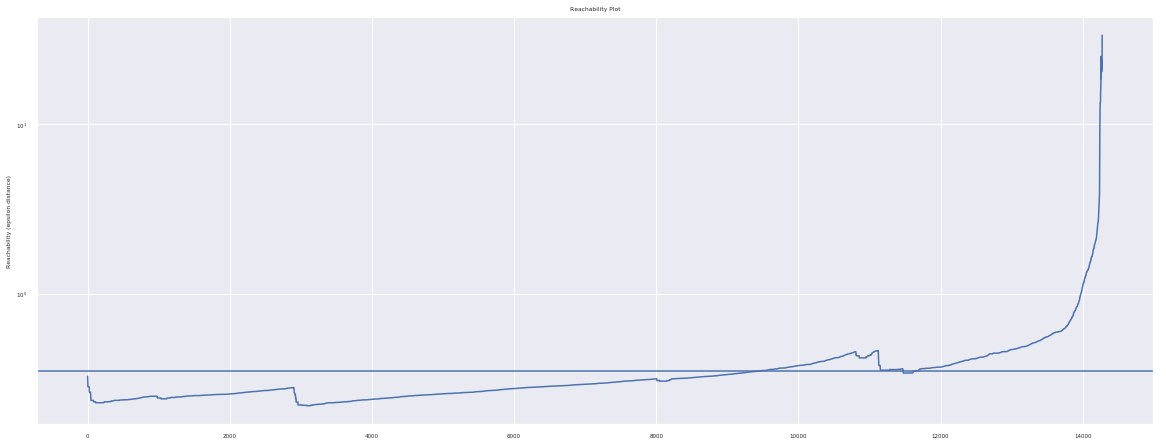

In [51]:
reach_size = (20, 7.5)
fig, ax = plt.subplots(figsize=reach_size)
print X_clust.shape
# Reachability plot
ax.set_yscale("log")
ax.plot(X_clust['space'], X_clust['reachability'], '-')
ax.axhline(eps)
ax.set_ylabel('Reachability (epsilon distance)')
ax.set_title('Reachability Plot')

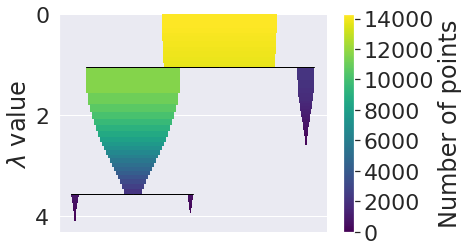

In [8]:
import hdbscan
import sys

clusterer = hdbscan.HDBSCAN(min_cluster_size=N).fit(X_norm)


len(X_clust.labels.unique())
#print X_clust['labels']
clusterer.condensed_tree_.plot()
#clusterer.single_linkage_tree_.plot()


In [9]:
hierarchy = clusterer.cluster_hierarchy_
alt_labels = hierarchy.get_clusters(0.100, 5)

AttributeError: 'HDBSCAN' object has no attribute 'cluster_hierarchy_'

In [ ]:
# generate the linkage matrix# gener 
Z = linkage(X, 'average', metric='euclidean')

c, coph_dists = cophenet(Z, pdist(X))

# calculate full dendrogram
#plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')  
cluster.fit_predict(X) 

X2['labels']=cluster.labels_
X['labels']=cluster.labels_

In [ ]:
X_copy = X[['u-g', 'g-r', 'r-i', 'i-z', 'z-y', 'u-G', 'u-RP', 'u-BP']].copy()
result = pd.DataFrame()
for i in range(0, 4):
    #print X_copy[X['labels']==i].std(axis=0).to_frame()
    #print clust_label_stats
    result = pd.concat([result, X_copy[X['labels']==i].std(axis=0).to_frame().T], ignore_index=True)
    
result

In [ ]:
ax = result.T.plot.bar(rot=0)
ax.set_ylim(0,3)

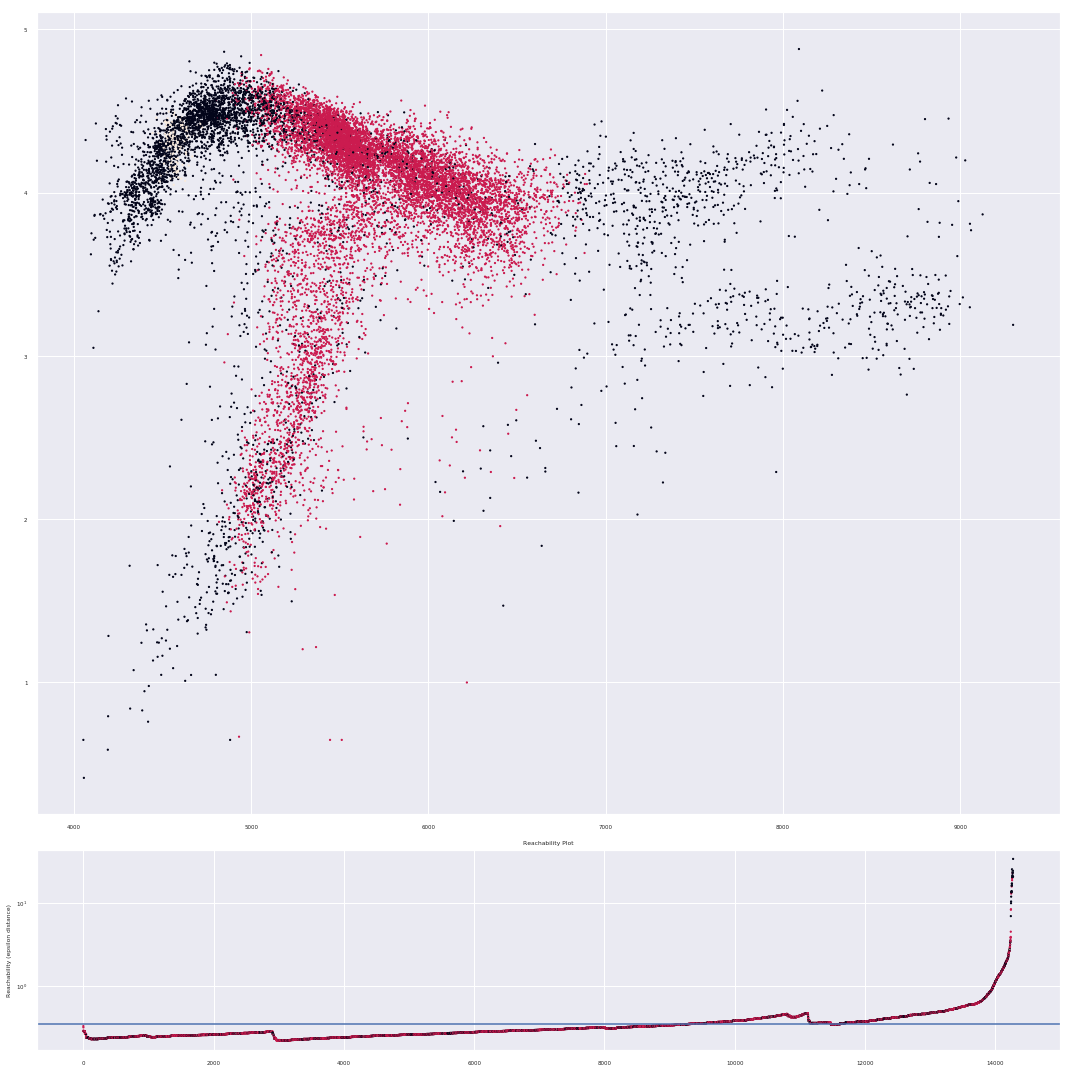

In [54]:
reach_size = (20, 7.5)

fig = plt.figure(figsize=(15, 15)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1]) 
ax0 = plt.subplot(gs[0])
ax0.scatter(X_clust['Teff'], X_clust['logg'], c=X_clust['labels'], s=1.5)
ax1 = plt.subplot(gs[1])
ax1.scatter(X_clust['space'], X_clust['reachability'], c=X_clust['labels'], s=1.5)
ax1.set_yscale("log")
ax1.axhline(eps)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')
plt.tight_layout()

In [ ]:
# T-SNE
from sklearn.manifold import TSNE

projection = TSNE().fit_transform(X2_norm)

In [ ]:
fig, ax = plt.subplots(figsize=(13, 13))
plt.scatter(*projection.T, s=1.5, c=X_clust['labels'])

In [ ]:
plt.scatter(X2_norm)

In [ ]:
plt.scatter(*projection.T, s=1.5, c=X2_norm['logg'])

In [ ]:
plt.scatter(*projection.T, s=1.5, c=X2_norm['feh'])

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_2d[:, 0], X_2d[:, 1], c=X2['Teff'], s = 100)
ax.legend()
plt.show()
plt.savefig('tsne_all_non_spectroscopic')

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_2d[:, 0], X_2d[:, 1], c=X2['logg'], s = 100)
ax.legend()
plt.show()
plt.savefig('tsne_all_non_spectroscopic')

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_2d[:, 0], X_2d[:, 1], c=X2['feh'], s = 100)
ax.legend()
plt.show()
plt.savefig('tsne_all_non_spectroscopic')